In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from matplotlib import rc
from matplotlib import rcParams

In [31]:
def parse_elapsed_time(str_time):
    tmp = str_time.split(':')
    return float(int(tmp[0]) * 3600 + int(tmp[1]) * 60) + float(tmp[2])

def parse_config_log_realexperiment(filename):
    f = open(filename)

    lines = f.readlines()
    round_time = []
    test_accuracy = []

    for line in lines:
        tmp = line.strip().split(' ')
        if 'fit_round' in tmp and 'received' in tmp:
            round_time.append(parse_elapsed_time(tmp[tmp.index('fit_round')-2]))
        elif 'fit' in tmp and 'progress:' in tmp:
            test_accuracy.append(float(tmp[tmp.index('progress:')+4][:-2]))
    
    results = {}
    results['round_time'] = round_time
    results['test_accuracy'] = test_accuracy

    return results

In [238]:
# fedavg_1T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05161107_2.log')
# fedavg_2T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05161107_ddl_2T.log')
fedavg_1T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05171552_ddl_1T_2_realreal.log')
fedavg_2T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05171552_ddl_2T_2.log')
fedavg_spc = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05171552_ddl_smartpc.log')
fedavg_wfa = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05171552_ddl_wfa_2.log')

fedprox_1T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05171552_ddl_1T.log')
fedprox_2T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05171552_ddl_2T_2.log')
fedprox_ss = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05171552_ss_2.log')

fedbalancer = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedbalancer_21devices_05171552_fb_2.log')
fedbalancer_AS = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedbalancer_21devices_05171552_fb_p0_0_dss0_25_lss0_1_w5.log')

In [153]:
import sys
def measure_time(log_dict, objective, what_to_check):
    i = -1
    for i, acc in enumerate(log_dict[what_to_check]):
        if acc >= objective:
            return log_dict['round_time'][i]
    return sys.maxsize

In [86]:
def measure_final_acc(log_dict, what_to_check, global_final_time):
    max_accuracy = 0
    for i in range(len(log_dict['round_time'])):
        if log_dict['round_time'][i] >= global_final_time:
            return max_accuracy
        else:
            if log_dict[what_to_check][i] >= max_accuracy:
                max_accuracy = log_dict[what_to_check][i]
    return max_accuracy

In [105]:
def measure_final_acc(log_dict, what_to_check, global_final_time):
    for i in range(len(log_dict['round_time'])):
        if log_dict['round_time'][i] >= global_final_time:
            return log_dict[what_to_check][i-1]
    return log_dict[what_to_check][-1]

In [21]:
def perfect_plot(ax, xarr, yarr, label):
    if len(xarr) != len(yarr):
        ax.plot(xarr[:-1], yarr, label = label)
    else:
        ax.plot(xarr, yarr, label = label)

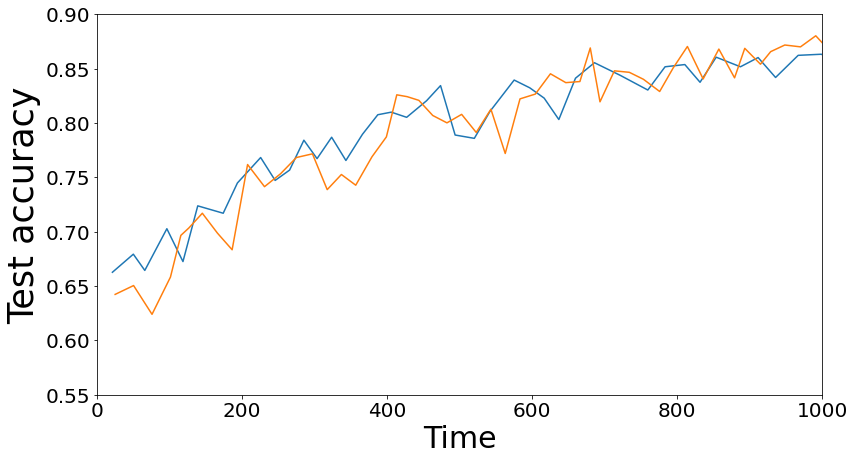

In [186]:
plt.rc('text', usetex=False)

fig, ax = plt.subplots(figsize=(13, 7))

ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel('Test accuracy', fontsize=35)
plt.tick_params(labelsize=20) #27
ax.set_title('', fontsize=30)
plt.ylim([0.55,0.9])
plt.xlim([0,1000])

# perfect_plot(ax, fedavg['round_time'], fedavg['test_accuracy'], label='fedavg')
# perfect_plot(ax, fedpro['round_time'], fedpro['test_accuracy'], label='fedprox')
perfect_plot(ax, fedavg_spc['round_time'], fedavg_spc['test_accuracy'], label='spc')
perfect_plot(ax, fedbalancer['round_time'], fedbalancer['test_accuracy'], label='fb')
# perfect_plot(ax, fedba2['round_time'], fedba2['test_accuracy'], label='fedba2')

In [33]:
fedavg['round_time']

[14.761089,
 29.853464,
 44.905996,
 59.988395,
 75.059912,
 90.138596,
 105.287766,
 120.365929,
 135.424499,
 150.493826,
 165.568918,
 180.724133,
 195.776977,
 210.854629,
 225.90686,
 241.008043,
 256.07502,
 271.131474,
 286.221775,
 301.29507,
 316.369986,
 331.4222,
 346.483726,
 361.561443,
 376.629862,
 391.686852,
 406.75401899999997,
 421.828092,
 436.883816,
 451.956674,
 467.012117,
 482.093454,
 497.159979,
 512.267696,
 527.326566,
 542.375505,
 557.440376,
 572.51608,
 587.569118,
 602.638165,
 617.718834,
 632.824667,
 647.891713,
 662.974286,
 678.046402,
 693.113437,
 708.175819,
 723.255587,
 738.310542,
 753.378972,
 768.444696,
 783.511466,
 798.565525,
 813.622005,
 828.683914,
 843.7491219999999,
 858.812759,
 873.886919,
 888.959805,
 904.025775,
 919.098118,
 934.159423,
 949.222955,
 964.29263,
 979.3647,
 994.438581,
 1009.509881,
 1024.579551,
 1039.649077,
 1054.714109,
 1069.779108,
 1084.838987,
 1099.911582,
 1114.98687,
 1130.029683,
 1145.094845,
 11

In [87]:
global_final_time = 754
what_to_check='test_accuracy'
objective = measure_final_acc(fedavg, what_to_check, global_final_time)
tta1 = measure_time(fedavg, objective, what_to_check)
tta2 = measure_time(fedpro, objective, what_to_check)
tta5 = measure_time(fedbal, objective, what_to_check)
tta6 = measure_time(fedba2, objective, what_to_check)

In [253]:
global_final_time = 981
what_to_check='test_accuracy'
objective = measure_final_acc(fedavg_spc, what_to_check, global_final_time)

tta1 = measure_time(fedavg_1T, objective, what_to_check)
tta2 = measure_time(fedavg_2T, objective, what_to_check)
tta3 = measure_time(fedavg_spc, objective, what_to_check)
tta4 = measure_time(fedavg_wfa, objective, what_to_check)

tta5 = measure_time(fedprox_1T, objective, what_to_check)
tta6 = measure_time(fedprox_2T, objective, what_to_check)
tta9 = measure_time(fedprox_ss, objective, what_to_check)

tta7 = measure_time(fedbalancer, objective, what_to_check)
tta8 = measure_time(fedbalancer_AS, objective, what_to_check)

acc1 = measure_final_acc(fedavg_1T, what_to_check, global_final_time)
acc2 = measure_final_acc(fedavg_2T, what_to_check, global_final_time)
acc3 = measure_final_acc(fedavg_spc, what_to_check, global_final_time)
acc4 = measure_final_acc(fedavg_wfa, what_to_check, global_final_time)

acc5 = measure_final_acc(fedprox_1T, what_to_check, global_final_time)
acc6 = measure_final_acc(fedprox_2T, what_to_check, global_final_time)
acc9 = measure_final_acc(fedprox_ss, what_to_check, global_final_time)

acc7 = measure_final_acc(fedbalancer, what_to_check, global_final_time)
acc8 = measure_final_acc(fedbalancer_AS, what_to_check, global_final_time)

In [254]:
acc1, acc2, acc3, acc4, acc5, acc6, acc9, acc7, acc8

(0.8289785981178284,
 0.8004750609397888,
 0.8622328042984009,
 0.8530709147453308,
 0.8564642071723938,
 0.8493382930755615,
 0.829657256603241,
 0.870037317276001,
 0.8333898782730103)

In [255]:
tta = tta3
tta / tta1, tta / tta2, tta / tta3, tta / tta4, tta / tta5, tta / tta6, tta / tta9, tta / tta7, tta / tta8

(1.0057940340319722,
 0.4187512312315418,
 1.0,
 0.9345408768928608,
 1.2993564141194254,
 0.6989873634360205,
 0.8443659170408147,
 1.4214361852197746,
 1.2170688787994033)

In [168]:
tta1, tta3, tta5, tta7, tta8

(9223372036854775807, 966.67939, 743.967844, 898.893173, 794.268432)

In [89]:
objective

0.7757040858268738

In [51]:
tta1, tta2, tta5, tta6

(9223372036854775807, 581.426324, 553.357666, 681.650138)

In [50]:
tta1

9223372036854775807

In [299]:
fedavg_1T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181327_ddl_1T_1.log')
fedavg_2T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181327_ddl_2T_2.log')
fedavg_spc = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181327_ddl_smartpc_1.log')
fedavg_wfa = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181327_ddl_wfa_1.log')

fedprox_1T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05181327_ddl_1T_2.log')
fedprox_2T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05181327_ddl_2T_2.log')
fedprox_ss = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05181327_ss_2.log')

fedbalancer = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedbalancer_21devices_05181327_fb_1.log')
#fedbalancer_AS = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedbalancer_21devices_05171552_fb_p0_0_dss0_25_lss0_1_w5.log')

In [308]:
global_final_time = 1452
what_to_check='test_accuracy'
objective = measure_final_acc(fedavg_2T, what_to_check, global_final_time)

tta1 = measure_time(fedavg_1T, objective, what_to_check)
tta2 = measure_time(fedavg_2T, objective, what_to_check)
tta3 = measure_time(fedavg_spc, objective, what_to_check)
tta4 = measure_time(fedavg_wfa, objective, what_to_check)

tta5 = measure_time(fedprox_1T, objective, what_to_check)
tta6 = measure_time(fedprox_2T, objective, what_to_check)
tta9 = measure_time(fedprox_ss, objective, what_to_check)

tta7 = measure_time(fedbalancer, objective, what_to_check)
#tta8 = measure_time(fedbalancer_AS, objective, what_to_check)

acc1 = measure_final_acc(fedavg_1T, what_to_check, global_final_time)
acc2 = measure_final_acc(fedavg_2T, what_to_check, global_final_time)
acc3 = measure_final_acc(fedavg_spc, what_to_check, global_final_time)
acc4 = measure_final_acc(fedavg_wfa, what_to_check, global_final_time)

acc5 = measure_final_acc(fedprox_1T, what_to_check, global_final_time)
acc6 = measure_final_acc(fedprox_2T, what_to_check, global_final_time)
acc9 = measure_final_acc(fedprox_ss, what_to_check, global_final_time)

acc7 = measure_final_acc(fedbalancer, what_to_check, global_final_time)
#acc8 = measure_final_acc(fedbalancer_AS, what_to_check, global_final_time)

In [309]:
tta = tta2
# print(tta / tta1, tta / tta2, tta / tta3, tta / tta4, tta / tta5, tta / tta6, tta / tta9, tta / tta7, tta / tta8)
print(tta / tta1, tta / tta2, tta / tta3, tta / tta4, tta / tta5, tta / tta6, tta / tta9, tta / tta7)

0.9636647219823377 1.0 0.34769999253299655 1.2731591247840817e-16 0.8757060629885765 1.0880908705196273 1.0638587939112525 1.3026253218368813


In [305]:
# print(acc1, acc2, acc3, acc4, acc5, acc6, acc9, acc7, acc8)
print(acc1, acc2, acc3, acc4, acc5, acc6, acc9, acc7)

0.8649473786354065 0.8676620125770569 0.8364438414573669 0.8391584753990173 0.8557855486869812 0.8737699389457703 0.8523922562599182 0.9043094515800476


In [359]:
fedavg_1T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181927_ddl_1T_1.log')
fedavg_2T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181927_ddl_2T_1.log')
fedavg_spc = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181927_ddl_smartpc_1.log')
fedavg_wfa = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedavg_final_experiment_05181927_ddl_wfa_1.log')

fedprox_1T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05181927_ddl_1T_2.log')
fedprox_2T = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05181927_ddl_2T_2.log')
fedprox_ss = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedprox_final_experiment_05181927_ss_2.log')

fedbalancer = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedbalancer_21devices_05181927_fb_1.log')
fedbalancer_AS = parse_config_log_realexperiment('/home/jmshin/FedBalancer_realexperiment/flower/examples/android/log/fedbalancer_21devices_05181927_fb_p0_0_dss0_25_lss0_1_w5.log')

In [360]:
global_final_time = 1110
what_to_check='test_accuracy'
objective = measure_final_acc(fedavg_1T, what_to_check, global_final_time)

tta1 = measure_time(fedavg_1T, objective, what_to_check)
tta2 = measure_time(fedavg_2T, objective, what_to_check)
tta3 = measure_time(fedavg_spc, objective, what_to_check)
tta4 = measure_time(fedavg_wfa, objective, what_to_check)

tta5 = measure_time(fedprox_1T, objective, what_to_check)
tta6 = measure_time(fedprox_2T, objective, what_to_check)
tta9 = measure_time(fedprox_ss, objective, what_to_check)

tta7 = measure_time(fedbalancer, objective, what_to_check)
tta8 = measure_time(fedbalancer_AS, objective, what_to_check)

acc1 = measure_final_acc(fedavg_1T, what_to_check, global_final_time)
acc2 = measure_final_acc(fedavg_2T, what_to_check, global_final_time)
acc3 = measure_final_acc(fedavg_spc, what_to_check, global_final_time)
acc4 = measure_final_acc(fedavg_wfa, what_to_check, global_final_time)

acc5 = measure_final_acc(fedprox_1T, what_to_check, global_final_time)
acc6 = measure_final_acc(fedprox_2T, what_to_check, global_final_time)
acc9 = measure_final_acc(fedprox_ss, what_to_check, global_final_time)

acc7 = measure_final_acc(fedbalancer, what_to_check, global_final_time)
acc8 = measure_final_acc(fedbalancer_AS, what_to_check, global_final_time)

In [361]:
tta = tta1
# print(tta / tta1, tta / tta2, tta / tta3, tta / tta4, tta / tta5, tta / tta6, tta / tta9, tta / tta7, tta / tta8)
print(tta / tta1, tta / tta2, tta / tta3, tta / tta4, tta / tta5, tta / tta6, tta / tta9, tta / tta7)

1.0 0.8358120682071809 0.4744643941308315 0.9847161460076533 0.910074070442619 0.9123347114781326 1.0803796599029662 1.2835884803857494


In [362]:
acc1, acc2, acc3, acc4, acc5, acc6, acc9, acc7

(0.8629114627838135,
 0.8316932320594788,
 0.8500169515609741,
 0.8452664017677307,
 0.8683406710624695,
 0.8571428656578064,
 0.8571428656578064,
 0.8815745115280151)